# Fannie Mae mortgage data

## Import cuxfilter

In [ ]:
from cuxfilter import charts
import cuxfilter
from bokeh import palettes
from cuxfilter.layouts import *
import panel as pn

In [ ]:
#update data_dir if you have downloaded datasets elsewhere
DATA_DIR = './data'

## Download required datasets

In [ ]:
from cuxfilter.sampledata import datasets_check
datasets_check('mortgage', base_dir=DATA_DIR)

In [ ]:
# add static legend to the dashboard widget section
def generate_legend_markdown():
    range_ = cux_df.data.delinquency_12_prediction.describe().round(2)
    legend = pn.GridBox(ncols=2)
    colors = palettes.Purples4

    legend.append(f'{range_["min"]} - {range_["25%"]}')
    legend.append(pn.pane.HTML(background=colors[0], width=30, height=10))
    legend.append(f'{range_["25%"]} - {range_["50%"]}')
    legend.append(pn.pane.HTML(background=colors[1], width=30, height=10))
    legend.append(f'{range_["50%"]} - {range_["75%"]}')
    legend.append(pn.pane.HTML(background=colors[2], width=30, height=10))
    legend.append(f'{range_["75%"]} <')
    legend.append(pn.pane.HTML(background=colors[3], width=30, height=10))
    return legend

## Define charts

In [ ]:
cux_df = cuxfilter.DataFrame.from_arrow(DATA_DIR+'/146M_predictions_v2.arrow')

In [ ]:
# set map_api_key parameter on choropleth to get bg map tiles
chart0 = charts.choropleth(x='zip', y='delinquency_12_prediction', color_column='delinquency_12_prediction', color_aggregate_fn='mean', geo_color_palette=palettes.Purples4,
                                  geoJSONSource = 'https://raw.githubusercontent.com/rapidsai/cuxfilter/GTC-2018-mortgage-visualization/javascript/demos/GTC%20demo/src/data/zip3-ms-rhs-lessprops.json',
                                  data_points=1000) #, mapbox_api_key="")

chart2 = charts.bar('delinquency_12_prediction',data_points=50)
chart3 = charts.range_slider('borrower_credit_score',data_points=50)
chart4 = charts.card(generate_legend_markdown(), widget=True, title="zip legend")

### Add mappings for chart1

In [ ]:
mapper1 = {}

for val in cux_df.data.dti.unique().to_pandas().tolist():
    mapper1[int(val)] = 'l_'+str(val)

chart1 = charts.panel_widgets.drop_down('dti', label_map=mapper1)
#also available: panel_widgets.multi_select

## Create a dashboard object

In [ ]:
d = cux_df.dashboard([chart0], sidebar=[chart1, chart4], layout=feature_and_base, theme=cuxfilter.themes.dark, title="Ajay's Dashboard")

In [ ]:
#add more charts
d.add_charts(charts=[chart2], sidebar=[chart3])

In [ ]:
#run dashboard inline within the notebook cell
d.app()

## Starting the dashboard

1. d.show('current_notebook_url:current_notebook_port') remote dashboard

2. d.app() inline within the notebook cell

Incase you need to stop the server:

- d.stop()

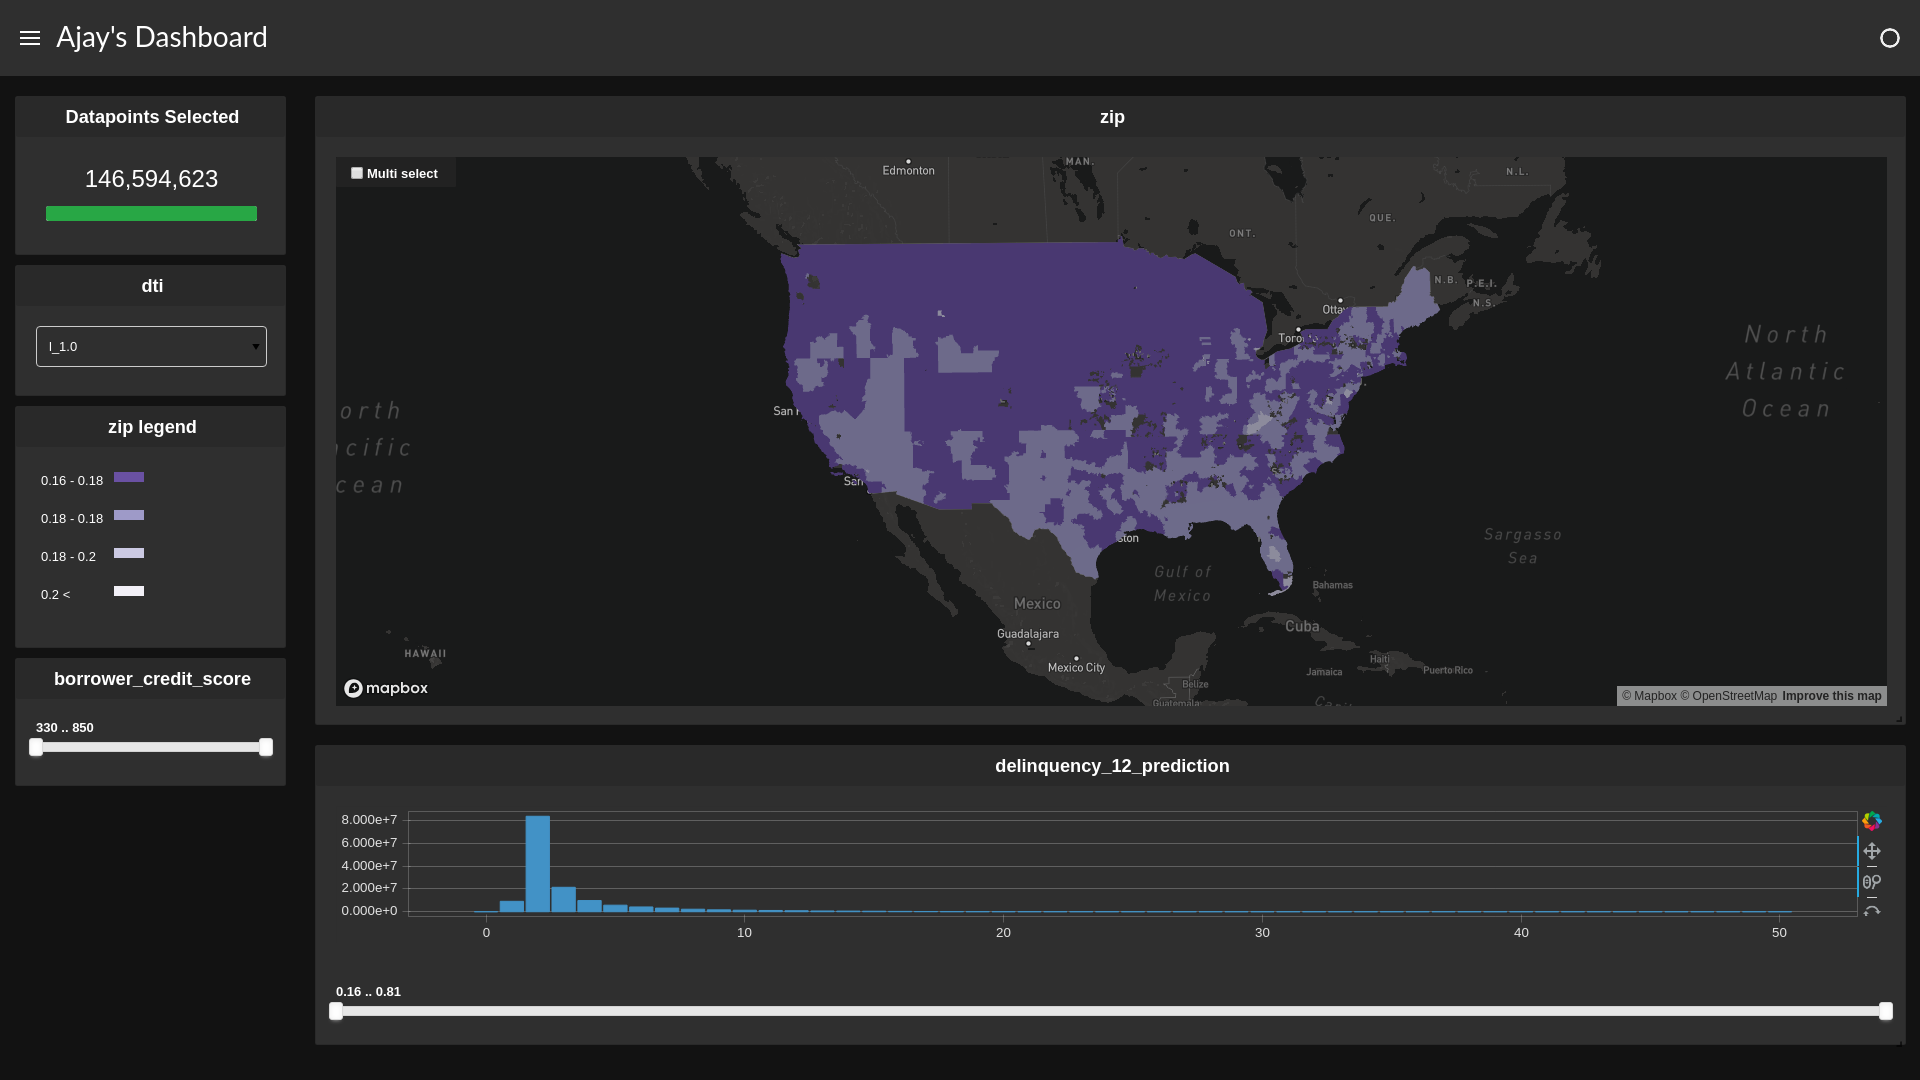

In [11]:
# preview the dashboard
await d.preview()

## Export the queried data into a dataframe

In [ ]:
queried_df = d.export()